Time step 15 complete. HTF Outlet Temperature: 335.54 K
Generating cross-section plots for Time Step 14...


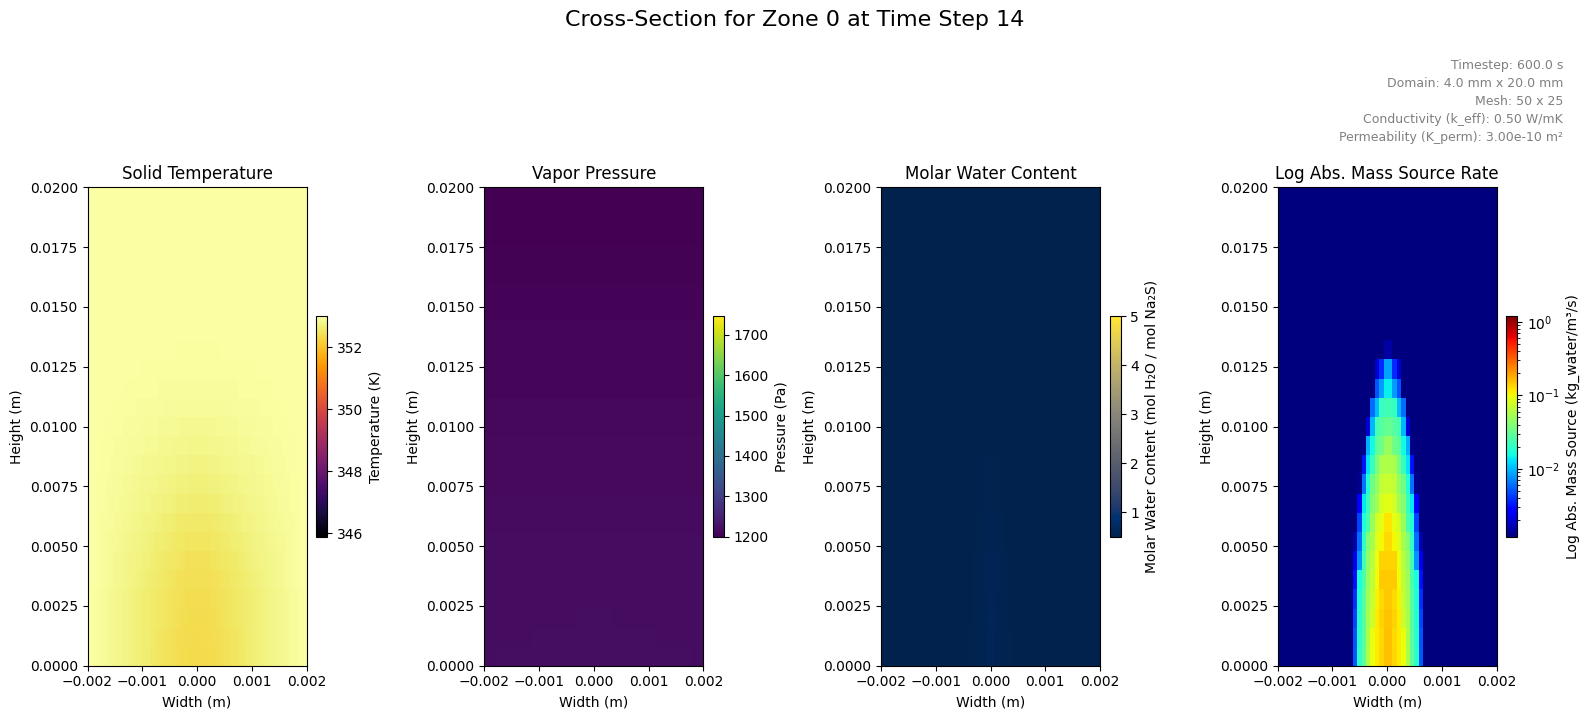


--- Time step 16/100, Time: 9000.00s ---
Starting coupling loop...
  [Coupling Iter 1] T/P for cell (0,0,0): 352.35 K, 1219.46 Pa
  [Debug] Mass Source Range: -0.00e+00 to 5.08e-02 kg/m^3/s
  [Coupling Iter 1] P_residual: 8.12e-04, T_residual: 6.02e-04, new omega: 0.100
  [Coupling Iter 2] T/P for cell (0,0,0): 352.38 K, 1219.09 Pa


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_ivp/bdf.py:415: RuntimeWarning: invalid value encountered in subtract
  D[order + 2] = d - D[order + 1]


  [Coupling Iter 2] P_residual: 1.34e-03, T_residual: 5.61e-04, new omega: 0.120
  [Coupling Iter 3] T/P for cell (0,0,0): 352.41 K, 1218.48 Pa
  [Coupling Iter 3] P_residual: 1.80e-03, T_residual: 5.21e-04, new omega: 0.144
  [Coupling Iter 4] T/P for cell (0,0,0): 352.44 K, 1217.67 Pa
  [Coupling Iter 4] P_residual: 2.19e-03, T_residual: 4.82e-04, new omega: 0.173
  [Coupling Iter 5] T/P for cell (0,0,0): 352.47 K, 1216.67 Pa
  [Coupling Iter 5] P_residual: 2.50e-03, T_residual: 4.44e-04, new omega: 0.207
  [Coupling Iter 6] T/P for cell (0,0,0): 352.49 K, 1215.54 Pa
  [Coupling Iter 6] P_residual: 2.73e-03, T_residual: 4.09e-04, new omega: 0.249
  [Coupling Iter 7] T/P for cell (0,0,0): 352.51 K, 1214.30 Pa
  [Coupling Iter 7] P_residual: 2.87e-03, T_residual: 3.76e-04, new omega: 0.250
  [Coupling Iter 8] T/P for cell (0,0,0): 352.53 K, 1213.00 Pa
  [Coupling Iter 8] P_residual: 2.77e-03, T_residual: 3.48e-04, new omega: 0.250
  [Coupling Iter 9] T/P for cell (0,0,0): 352.55 K, 121

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_ivp/bdf.py:415: RuntimeWarning: invalid value encountered in subtract
  D[order + 2] = d - D[order + 1]


  [Coupling Iter 9] P_residual: 2.54e-03, T_residual: 3.23e-04, new omega: 0.250
  [Coupling Iter 10] T/P for cell (0,0,0): 352.56 K, 1210.59 Pa
  [Coupling Iter 10] P_residual: 2.25e-03, T_residual: 3.02e-04, new omega: 0.250
  [Coupling Iter 11] T/P for cell (0,0,0): 352.58 K, 1209.57 Pa
  [Coupling Iter 11] P_residual: 1.95e-03, T_residual: 2.83e-04, new omega: 0.250
  [Coupling Iter 12] T/P for cell (0,0,0): 352.59 K, 1208.69 Pa
  [Coupling Iter 12] P_residual: 1.66e-03, T_residual: 2.66e-04, new omega: 0.250
  [Coupling Iter 13] T/P for cell (0,0,0): 352.60 K, 1207.94 Pa
  [Coupling Iter 13] P_residual: 1.39e-03, T_residual: 2.50e-04, new omega: 0.250
  [Coupling Iter 14] T/P for cell (0,0,0): 352.62 K, 1207.31 Pa
  [Coupling Iter 14] P_residual: 1.15e-03, T_residual: 2.36e-04, new omega: 0.250
  [Coupling Iter 15] T/P for cell (0,0,0): 352.63 K, 1206.79 Pa


Process ForkPoolWorker-199953:
Process ForkPoolWorker-199960:
Process ForkPoolWorker-199989:
Process ForkPoolWorker-199975:
Process ForkPoolWorker-199955:
Process ForkPoolWorker-199949:
Process ForkPoolWorker-199959:
Process ForkPoolWorker-199976:
Process ForkPoolWorker-199988:
Process ForkPoolWorker-199979:
Process ForkPoolWorker-199983:
Process ForkPoolWorker-199977:
Process ForkPoolWorker-199970:
Process ForkPoolWorker-199984:
Process ForkPoolWorker-199937:
Process ForkPoolWorker-199951:
Process ForkPoolWorker-199956:
Process ForkPoolWorker-199980:
Process ForkPoolWorker-199981:
Process ForkPoolWorker-199943:
Process ForkPoolWorker-199945:
Process ForkPoolWorker-199958:
Process ForkPoolWorker-199939:
Process ForkPoolWorker-199966:
Process ForkPoolWorker-199952:
Process ForkPoolWorker-199954:
Process ForkPoolWorker-199940:
Process ForkPoolWorker-199985:
Process ForkPoolWorker-199982:
Process ForkPoolWorker-199948:
Process ForkPoolWorker-199957:
Process ForkPoolWorker-199968:
Process 

KeyboardInterrupt: 

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output # Import the clear_output function
from simulation_parameters import *
# --- MODIFIED: Import property getters from utils ---
from utils import (check_convergence, calculate_residual, 
                   get_effective_thermal_conductivity, get_effective_permeability)
# --- END MODIFICATION ---
from physics_solvers import (solve_pressure, solve_heat_equation, update_fin_and_htf,
                             solve_inter_fin_conduction, solve_heat_equation_empty, solve_pressure_empty)
from hydration_kinetics import (predict_final_alphas_parallel, calculate_avg_sources,
                                  calculate_conversion)
# Import both plotting functions
from plotting_utils import plot_reactor_heatmap, plot_zone_cross_section

# --- Set which cross-sections to plot (can be lists) ---
PLOT_CROSS_SECTION_ZONE_INDICES = [0]  # Which zone(s) to view (e.g., [0, 5, 9])

indices = np.round(np.linspace(0, NUM_TIMESTEPS - 1, NUM_CROSS_SECTION_PLOTS)).astype(int)
indices = np.unique(indices).tolist()
print(f"num_points: {indices}")

PLOT_CROSS_SECTION_TIME_STEP_INDICES = indices

def initialize_state():
    """Initializes all state variables for the simulation."""
    print("Initializing reactor...")
    
    # State variables (lists of arrays, one for each zone)
    T_zones = [np.full((NZ, NX), float(T_INITIAL)) for _ in range(NUM_ZONES)]
    P_zones = [np.full((NZ, NX), float(P_INITIAL)) for _ in range(NUM_ZONES)] 
    alphas_zones = [np.tile(ALPHA_INITIAL, (NZ, NX, 1)) for _ in range(NUM_ZONES)]
    avg_mass_source_zones = [np.zeros((NZ, NX)) for _ in range(NUM_ZONES)]
    
    # HTF and Fin temperatures (1D arrays)
    T_htf_zones = np.full(NUM_ZONES, float(T_INITIAL))
    T_fin_zones = np.full(NUM_ZONES, float(T_INITIAL))
    
    # History for plots
    history = {
        'htf': [], 'avg_temp': [], 'avg_pressure': [], 'avg_conversion': []
    }
    
    return T_zones, P_zones, alphas_zones, avg_mass_source_zones, T_htf_zones, T_fin_zones, history

def solve_coupling_loop(n, dt, T_zones, P_zones, alphas_zones, avg_mass_source_zones, T_fin_zones, T_htf_zones):
    """Solves the main physics coupling loop for a single time step."""
    
    # Store state at the beginning of the time step
    alphas_old_zones = [a.copy() for a in alphas_zones]
    mass_source_guess_zones = [m.copy() for m in avg_mass_source_zones]
    avg_heat_source_zones_guess = [np.zeros((NZ, NX)) for _ in range(NUM_ZONES)] # Added for heat source relaxation
    
    # Guesses for the coupling loop
    T_guess_zones = [T.copy() for T in T_zones]
    P_guess_zones = [P.copy() for P in P_zones]
    T_fin_guess_zones = np.copy(T_fin_zones)
    
    current_omega = OMEGA_MASS_SOURCE_INITIAL
    last_P_residual = np.inf
    last_T_residual = np.inf # Added for T residual tracking
    
    print("Starting coupling loop...")
    for coupling_iter in range(MAX_ITER_COUPLING):
        
        # # --- DEBUG PRINT ---
        # if n in PLOT_CROSS_SECTION_TIME_STEP_INDICES:
        #     T_debug = T_guess_zones[0][0, 0]
        #     P_debug = P_guess_zones[0][0, 0]
        #     print(f"  [Coupling Iter {coupling_iter+1}] T/P for cell (0,0,0): {T_debug:.2f} K, {P_debug:.2f} Pa")
        
        # --- 3a. Predict Sources ---
        alphas_final_zones = predict_final_alphas_parallel(
            alphas_old_zones, T_guess_zones, P_guess_zones, dt
        )
        
        avg_heat_source_zones_new_calc = [] 
        avg_mass_source_zones_new_calc = [] 
        for i in range(NUM_ZONES):
            avg_heat, avg_mass = calculate_avg_sources(
                alphas_old_zones[i], alphas_final_zones[i], dt
            )
            avg_heat_source_zones_new_calc.append(avg_heat)
            avg_mass_source_zones_new_calc.append(avg_mass) 

        # --- Optional: Debug print for source terms ---
        if coupling_iter==0:
            all_mass_sources = np.concatenate([arr.flatten() for arr in avg_mass_source_zones_new_calc])
            print(f"  [Debug] Mass Source Range: {np.min(all_mass_sources):.2e} to {np.max(all_mass_sources):.2e} kg/m^3/s")
        
        # --- Check for NaN/Inf from kinetics solver ---
        has_nan = any(np.isnan(arr).any() for arr in avg_mass_source_zones_new_calc)
        has_inf = any(np.isinf(arr).any() for arr in avg_mass_source_zones_new_calc)

        if has_nan or has_inf:
            print(f"  [Coupling Iter {coupling_iter+1}] CRITICAL: Kinetics solver failed (NaN/Inf detected).")
            print("  This is likely due to numerical instability (oscillating T/P guesses).")
            print(f"  RECOMMENDATION: Reduce DT (currently {DT}) in simulation_parameters.py.")
            raise RuntimeError(f"Kinetics solver failed (NaN/Inf). Reduce DT from {DT}.")

        # --- 3b. Apply Source Relaxation ---
        # (Relax both heat and mass sources)
        for i in range(NUM_ZONES):
            mass_source_guess_zones[i] = (
                mass_source_guess_zones[i] * (1.0 - current_omega) +
                avg_mass_source_zones_new_calc[i] * current_omega
            )
            avg_heat_source_zones_guess[i] = (
                avg_heat_source_zones_guess[i] * (1.0 - current_omega) +
                avg_heat_source_zones_new_calc[i] * current_omega
            )
        
        avg_mass_source_zones = mass_source_guess_zones

        # --- 3c. Solve Spatial Physics ---
        T_new_guess_zones = [T.copy() for T in T_guess_zones]
        P_new_guess_zones = [P.copy() for P in P_guess_zones]
        T_fin_new_zones = np.copy(T_fin_guess_zones)
        
        T_htf_inlet_current_zone = T_HTF_IN
        
        for i in range(NUM_ZONES):
            
            # --- Solve Inner Zone Loop ---
            for zone_iter in range(MAX_ITER_ZONE):
                T_fin_old_for_zone = T_fin_new_zones[i]
                
                P_new_guess_zones[i] = solve_pressure(
                    P_guess_zones[i], avg_mass_source_zones[i], T_guess_zones[i], alphas_old_zones[i], P_INF, use_warm_start=True
                )
                
                T_new_guess_zones[i] = solve_heat_equation(
                    T_zones[i], avg_heat_source_zones_guess[i], alphas_old_zones[i], T_fin_guess_zones[i], dt # Use relaxed heat source
                )
                
                T_htf_outlet, T_fin_new_for_zone = update_fin_and_htf(
                    T_htf_inlet_current_zone, T_new_guess_zones[i], HTF_MASS_FLOW / NUM_ZONES, CP_HTF
                )
                
                T_fin_new_zones[i] = T_fin_new_for_zone
                
                if check_convergence(T_fin_new_for_zone, T_fin_old_for_zone, TOLERANCE_ZONE):
                    break # Zone converged
            
            T_htf_inlet_current_zone = T_htf_outlet
            T_htf_zones[i] = T_htf_outlet
        
        # --- 3d. Inter-Zone Conduction ---
        T_fin_new_zones = solve_inter_fin_conduction(T_fin_new_zones)
        
        # --- 3e. Check Convergence & Adapt ---
        T_converged = check_convergence(T_new_guess_zones, T_guess_zones, TOLERANCE_COUPLING)
        P_converged = check_convergence(P_new_guess_zones, P_guess_zones, TOLERANCE_COUPLING)
        Fin_converged = check_convergence(T_fin_new_zones, T_fin_guess_zones, TOLERANCE_COUPLING)
        
        current_T_residual = calculate_residual(T_new_guess_zones, T_guess_zones)
        current_P_residual = calculate_residual(P_new_guess_zones, P_guess_zones)
        
        if np.isnan(current_P_residual) or np.isnan(current_T_residual):
            print(f"  [Coupling Iter {coupling_iter+1}] CRITICAL: Residual is NaN.")
            print(f"  RECOMMENDATION: Reduce DT (currently {DT}) in simulation_parameters.py.")
            raise RuntimeError(f"Solver failed (NaN residual). Reduce DT from {DT}.")
        
        if coupling_iter > 0:
            # Use the dominant residual (or combined) to adapt source omega
            if current_P_residual < last_P_residual or current_T_residual < last_T_residual:
                current_omega = min(current_omega * ADAPTIVE_OMEGA_INCREASE, OMEGA_MASS_SOURCE_MAX)
            else:
                current_omega = max(current_omega * ADAPTIVE_OMEGA_DECREASE, OMEGA_MASS_SOURCE_MIN)
            
            last_P_residual = current_P_residual
            last_T_residual = current_T_residual # Store T_residual

        if (coupling_iter + 1) % 1 == 0 or coupling_iter == MAX_ITER_COUPLING - 1:
             print(f"  [Coupling Iter {coupling_iter+1}] P_residual: {current_P_residual:.2e}, T_residual: {current_T_residual:.2e}, new omega: {current_omega:.3f}")

        
        # --- 3f. Apply State Relaxation ---
        
        # 1. Calculate the iteration-based halving factor
        halving_factor = 0.5 ** (coupling_iter // 100)
        
        # 2. Determine the current "ceiling" relaxation based on iterations
        current_omega_T_ceiling = OMEGA_STATE_RELAXATION_T * halving_factor
        current_omega_P_ceiling = OMEGA_STATE_RELAXATION_P * halving_factor

        # 3. Calculate the maximum change in this iteration
        max_delta_T = 0.0
        max_delta_P = 0.0
        for i in range(NUM_ZONES):
            max_delta_T = max(max_delta_T, np.max(np.abs(T_new_guess_zones[i] - T_guess_zones[i])))
            max_delta_P = max(max_delta_P, np.max(np.abs(P_new_guess_zones[i] - P_guess_zones[i])))

        # 4. Dynamically calculate relaxation factors based on max change
        MAX_CHANGE_T = 1.0  # Cap T change at 1.0 K per iteration
        MAX_CHANGE_P = 500.0 # Pa
        
        omega_T = min(current_omega_T_ceiling, MAX_CHANGE_T / (max_delta_T + 1e-10))
        omega_P = min(current_omega_P_ceiling, MAX_CHANGE_P / (max_delta_P + 1e-10))

        # Apply the new, safer relaxation
        for i in range(NUM_ZONES):
            T_guess_zones[i] = (1.0 - omega_T) * T_guess_zones[i] + omega_T * T_new_guess_zones[i]
            P_guess_zones[i] = (1.0 - omega_P) * P_guess_zones[i] + omega_P * P_new_guess_zones[i]
        
        T_fin_guess_zones = (1.0 - omega_T) * T_fin_guess_zones + omega_T * T_fin_new_zones
        
        if T_converged and P_converged and Fin_converged and coupling_iter >= 4:
            print(f"Coupling loop converged in {coupling_iter + 1} iterations.")
            break # Main coupling loop converged
            
    # Return the converged state and the final sources
    return T_guess_zones, P_guess_zones, T_fin_guess_zones, alphas_final_zones, avg_mass_source_zones, T_htf_zones


def log_and_plot_timestep(n, T_zones, P_zones, alphas_zones, avg_mass_source_zones, T_htf_zones, history, dt, nx, nz):
    """Handles all output, plotting, and history saving for a completed time step."""
    
    T_outlet = T_htf_zones[NUM_ZONES - 1]
    print(f"Time step {n+1} complete. HTF Outlet Temperature: {T_outlet:.2f} K")

    if n in PLOT_CROSS_SECTION_TIME_STEP_INDICES:
        # clear_output(wait=True) # Clear console output for ipynb
        print(f"Generating cross-section plots for Time Step {n}...")
        
        for zone_idx in PLOT_CROSS_SECTION_ZONE_INDICES:
            # --- NEW: Get property values for plotting ---
            # (We just take the [0,0] value as a representative placeholder)
            alphas = alphas_zones[zone_idx]
            k_eff = get_effective_thermal_conductivity(alphas)[0, 0]
            perm = get_effective_permeability(alphas)[0, 0]
            # --- END NEW ---
            
            plot_zone_cross_section(
                T_zones[zone_idx], P_zones[zone_idx], alphas_zones[zone_idx],
                avg_mass_source_zones[zone_idx],
                W, H, zone_idx, n,
                dt, nx, nz, k_eff, perm # Pass new params
            )

    # Calculate and store averages for plotting
    history['htf'].append(np.copy(T_htf_zones))
    history['avg_temp'].append([np.mean(T) for T in T_zones])
    history['avg_pressure'].append([np.mean(P) for P in P_zones])
    history['avg_conversion'].append([np.mean(calculate_conversion(a)) for a in alphas_zones])

def plot_final_heatmaps(history):
    """Generates the 4-panel heatmap of all simulation results."""
    print("Generating heatmaps...")
    
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    fig.suptitle('Reactor Performance Over Time', fontsize=16)
    
    plot_reactor_heatmap(axes[0, 0], history['htf'], T_SIMULATION, HTF_PATH_LENGTH,
                         title='HTF Temperature Evolution', cbar_label='HTF Temperature (K)')

    plot_reactor_heatmap(axes[0, 1], history['avg_temp'], T_SIMULATION, HTF_PATH_LENGTH,
                         title='Average Solid Temperature Evolution', cbar_label='Avg. Temperature (K)')

    plot_reactor_heatmap(axes[1, 0], history['avg_pressure'], T_SIMULATION, HTF_PATH_LENGTH,
                         title='Average Vapor Pressure Evolution', cbar_label='Avg. Pressure (Pa)')

    plot_reactor_heatmap(axes[1, 1], history['avg_conversion'], T_SIMULATION, HTF_PATH_LENGTH,
                         title='Average Conversion Evolution', cbar_label='Conversion (0.0 - 1.0)')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for main title
    plt.show()

def run_simulation():
    # --- 1. Initialization ---
    T_zones, P_zones, alphas_zones, avg_mass_source_zones, \
    T_htf_zones, T_fin_zones, history = initialize_state()
    
    # --- 2. Main Time Loop ---
    for n in range(NUM_TIMESTEPS):
        t_current = n * DT
        print(f"\n--- Time step {n+1}/{NUM_TIMESTEPS}, Time: {t_current:.2f}s ---")

        # --- 3. Main Coupling Loop (Solves the time step) ---
        T_guess, P_guess, T_fin_guess, alphas_final, \
        avg_mass_source_final, T_htf_final = solve_coupling_loop(
            n, DT, T_zones, P_zones, alphas_zones, 
            avg_mass_source_zones, T_fin_zones, T_htf_zones
        )
        
        # --- 4. Finalize Time Step ---
        T_zones = T_guess
        P_zones = P_guess
        T_fin_zones = T_fin_guess
        alphas_zones = alphas_final
        avg_mass_source_zones = avg_mass_source_final # Store converged source
        T_htf_zones = T_htf_final # Store converged HTF temps
        
        clear_output(wait=True) # Clear console output for ipynb
        # --- 5. Output and Store Results for the Time Step ---
        log_and_plot_timestep(
            n, T_zones, P_zones, alphas_zones, 
            avg_mass_source_zones, T_htf_zones, history,
            DT, NX, NZ # Pass params
        )
    
    # --- 6. Plotting ---
    plot_final_heatmaps(history)


if __name__ == "__main__":
    # This check is important for multiprocessing to work correctly
    run_simulation()